# compare On-Off Beam BNB data to MC-BNB/DATA cosmic overlay 
This is done by:
1. scaling the Overlay by the number of POT in the BeamOn
2. Scaling the OffBeam to the OnBeam exposure time

and then studying what happens to the On-Off/overlay comparison after all cuts

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
pd.set_option('precision', 2)
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8_v9',
    'date': '2018_04_28'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.480008207788 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_vs_On_Off/'

In [3]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OnBeam']+'_04_'+versions['date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OnBeam']+'_05_'+versions['date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print_and_say("%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume')

OffBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OffBeam']+'_04_'+versions['date']+'_vertices.csv')
                     ,pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OffBeam']+'_05_'+versions['date']+'_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print_and_say("%d"%len(OffBeam)+' pairs from Off-Beam, %d'%len(OffBeamFV)+' in Fiducial Volume')

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['date'],filename=versions['Overlay']+'_'+versions['date']+'_vertices')
print_and_say("%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay')

38199 pairs from On-Beam, 24345 in Fiducial Volume
34730 pairs from Off-Beam, 21107 in Fiducial Volume
28935 pairs from MC-BNB + cosmic DATA overlay
19125 pairs in FV
5069 are 1mu-1p, 26.5%
4364 are other pairs, 22.8%
9692 are cosmic, 50.7%
--------------------------------------------------------------
2404 are CC 1p 0pi, 12.6%
9692 cosmic pairs and 5069 mu-p pairs in overlay


In [4]:
# cuts_pureff = apply_cuts_MCbnbDATAcosmic()
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,do_PIDaCali=True
                                                                   ,cuts_order  = ['no cut','PIDa','flash','length','vertex activity','delta phi','soft Pt'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.5%,100.0%,12.6%,no cut,100.0% (5069),100.0% (4364),100.0% (9692),100.0% (2404)
PIDa,65.4%,54.1%,68.1%,26.7%,PIDa,65.4% (3316),34.6% (1511),13.4% (1301),68.1% (1637)
flash,61.3%,59.7%,63.6%,29.4%,flash,61.3% (3106),33.8% (1474),6.5% (626),63.6% (1530)
length,54.7%,68.0%,57.8%,34.1%,length,54.7% (2771),20.1% (875),4.4% (429),57.8% (1389)
vertex activity,37.5%,70.3%,50.2%,44.6%,vertex activity,37.5% (1902),12.9% (565),2.4% (237),50.2% (1206)
delta phi,24.4%,81.4%,38.1%,60.4%,delta phi,24.4% (1236),3.1% (136),1.5% (146),38.1% (917)
soft Pt,20.9%,88.3%,34.4%,68.8%,soft Pt,20.9% (1061),2.0% (87),0.6% (54),34.4% (827)


# overlay subsamples-scaling

In [5]:
f_Cosmic=0.88
overlay_scalings = dict()
overlay_scalings['only POT'] = get_samples_scaling( N_total='MC(tot) x POT' # total integral of all overlay 
                                      , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                      , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['POT scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total='MC(tot) x POT'  # total integral of all overlay                                       
                                                                         , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                         , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['N(On) scaling'] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                       
                                               , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                               , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                       
                                                                         , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                         , OverlaySubsamples=reducedOverlay['no cut'])
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling': {   '1mu-1p': 1.2729411764705882,
                         'CC 1p 0pi': 1.2729411764705882,
                         'cosmic': 1.2729411764705882,
                         'other pairs': 1.2729411764705882},
    'N(On) scaling and f(cosmic)=0.88': {   '1mu-1p': 0.3096999893989187,
                                            'CC 1p 0pi': 0.30969998939891874,
                                            'cosmic': 2.2104416013206767,
                                            'other pairs': 0.3096999893989187},
    'POT scaling and f(cosmic)=0.88': {   '1mu-1p': 0.11678350862653204,
                                          'CC 1p 0pi': 0.11678350862653206,
                                          'cosmic': 0.83352642768020679,
                                          'other pairs': 0.11678350862653204},
    'only POT': {   '1mu-1p': 0.48000820778826886,
                    'CC 1p 0pi': 0.48000820778826886,
                    'cosmic': 0.4800082077

## collinearity

In [6]:
cuts_order  = ['no cut','flash','length','vertex activity','delta phi','soft Pt'] #,'PIDa'
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut'] #,'PIDa cut'

reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


In [45]:

# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# written April-29, 2018
def OnBeam_OffBeam( OnBeamSample=None , OffBeamSample=None , debug=0                   
                   , var='PIDa_assigned_proton' , x_label=r'$PID_a^p$' , y_label='counts'                   
                   , bins=np.linspace(0,30,31)                    
                   , ax=None, figsize=(14,6),fontsize=25                   
                   , color=OnBeamColor
                   , doOffBeam_scaling=True
                   , OriginalOnBeamSample=None , OriginalOffBeamSample=None
                   , remove_ticks_x=False, remove_ticks_y=False):
    bin_width = bins[1]-bins[0]
    mid = 0.5*(bins[:-1]+bins[1:])


    if ax is None: fig,ax=plt.subplots(figsize=figsize)
    h_OnBeam,edges = np.histogram( OnBeamSample[var] , bins=bins )
    h_OnBeam_err = np.sqrt(h_OnBeam)
    h_OffBeam,edges = np.histogram( OffBeamSample[var] , bins=bins )
    h_OffBeam_err = np.sqrt(h_OffBeam)
    
    if doOffBeam_scaling==True:#{
        h_OnBeam_minus_OffBeam = h_OnBeam - OffBeam_scaling*h_OffBeam
        h_OnBeam_minus_OffBeam_err = np.sqrt( np.abs(h_OnBeam + OffBeam_scaling*OffBeam_scaling*h_OffBeam) )
        Integral = len(OnBeamSample) - OffBeam_scaling*len(OffBeamSample)
        Integral_Original = len(OriginalOnBeamSample) - OffBeam_scaling*len(OriginalOffBeamSample)
    #}
    else:#{
        h_OnBeam_minus_OffBeam = h_OnBeam - h_OffBeam
        h_OnBeam_minus_OffBeam_err = np.sqrt( np.abs(h_OnBeam + h_OffBeam) )
        Integral = len(OnBeamSample) - len(OffBeamSample)
        Integral_Original = len(OriginalOnBeamSample) - len(OriginalOffBeamSample)
    #}


    plt.errorbar( x=mid, xerr=bin_width/2., markersize=12
                 , y=h_OnBeam_minus_OffBeam , yerr=h_OnBeam_minus_OffBeam_err
                 , fmt='o', color=color , ecolor='black'
                 , label=r'(On-Off) Beam ($\int=$%.1f=%.1f'%(Integral,100*Integral/Integral_Original)+'%)'
                )
    if debug>1: print "OnBeam-OffBeam (bins[:-1]):\n",bins[:-1]
    plt.plot([np.min(ax.get_xlim()),np.min(ax.get_xlim())],[0,0],'--',color='black',linewidth=2)
    
    set_axes(ax,x_label=x_label,y_label=y_label,do_add_grid=True,fontsize=fontsize
             ,xlim=(np.min(bins)-bin_width,np.max(bins)+bin_width)
             ,remove_ticks_x=remove_ticks_x, remove_ticks_y=remove_ticks_y
            )
    plt.tight_layout()
    return h_OnBeam_minus_OffBeam,h_OnBeam_minus_OffBeam_err
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -


# ------------------------------------------------
# April-29, 2018
def plot_OnOff_nocut_finalcut(var='theta_12',x_label= r'$\theta_{1,2}$ [deg.]',bins=linspace(0,180,31)
                        ,scaling_name='only POT'
                        ,color ='black',x_ticks=None
                        ,figsize=(24,8)
                        ,overlay_scalings=None,do_OffBeam=False
                        ,reducedOffBeam=None,reducedOnBeam=None,reducedOverlay=None
                        ,f_Cosmic=None
                        ,chi2_xrange=None,xlim=None
                        ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                        ,debug=0
                        ,do_show_cut=True,x_varcut=(0,np.inf)
                        ,do_only_preselection=False
                        ):
    fig = plt.figure(figsize=figsize)
    
    for i_cut,(cut_name,cut_label) in enumerate(zip(['no cut',last_cut_name]
                                                  ,['preselection',last_cut_label])):#{
                                                  
        ax = fig.add_subplot(1,1 if do_only_preselection else 2 ,i_cut + 1)
        
        h_OnOff,h_OnOff_err = OnBeam_OffBeam( OnBeamSample=reducedOnBeam[cut_name] , OffBeamSample=reducedOffBeam[cut_name] , debug=debug
                                , var=var , x_label=x_label , bins=bins
                                , ax=ax, color=color
                                , doOffBeam_scaling=True
                                , OriginalOnBeamSample=reducedOnBeam['no cut'] , OriginalOffBeamSample=reducedOffBeam['no cut']
                               )
        
                                 
        h_stack,_=plot_stacked_MCsamples(reducedOverlay = reducedOverlay
                                         , debug=0
                                         , overlay_scaling=overlay_scalings[scaling_name]
                                         , cut_name=cut_name
                                         , var=var, x_label=x_label, y_label='overlay prediction',xlim=xlim
                                         , bins=bins , alpha=0.8, ax=ax
                                         , do_add_legend=False
                                 );
        chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                     , h1=h_OnOff , h2=h_stack
                                     , h1err=h_OnOff_err, h2err=np.sqrt(h_stack)
                                     , debug=0 )
        chi2_txt = r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf)
        ax.set_title(cut_label+(', $f_{cosmic}=%.2f$'%f_Cosmic if f_Cosmic is not None else '') + ',' + chi2_txt
                                                  ,y=1.02,fontsize=25)
        if do_show_cut:
            plt.plot([x_varcut[0],x_varcut[0]],ax.get_ylim(),'--',[x_varcut[1],x_varcut[1]],ax.get_ylim(),'--',color='black')
        if debug: print cut_label,': sum of h_OnOff:',np.sum(h_OnOff),',sum of h_stack:',np.sum(h_stack)
        if do_only_preselection and i_cut==0: return
    #}
    plt.tight_layout()
    return h_OnOff,h_stack
# ------------------------------------------------

In [46]:
f_Cosmic = None

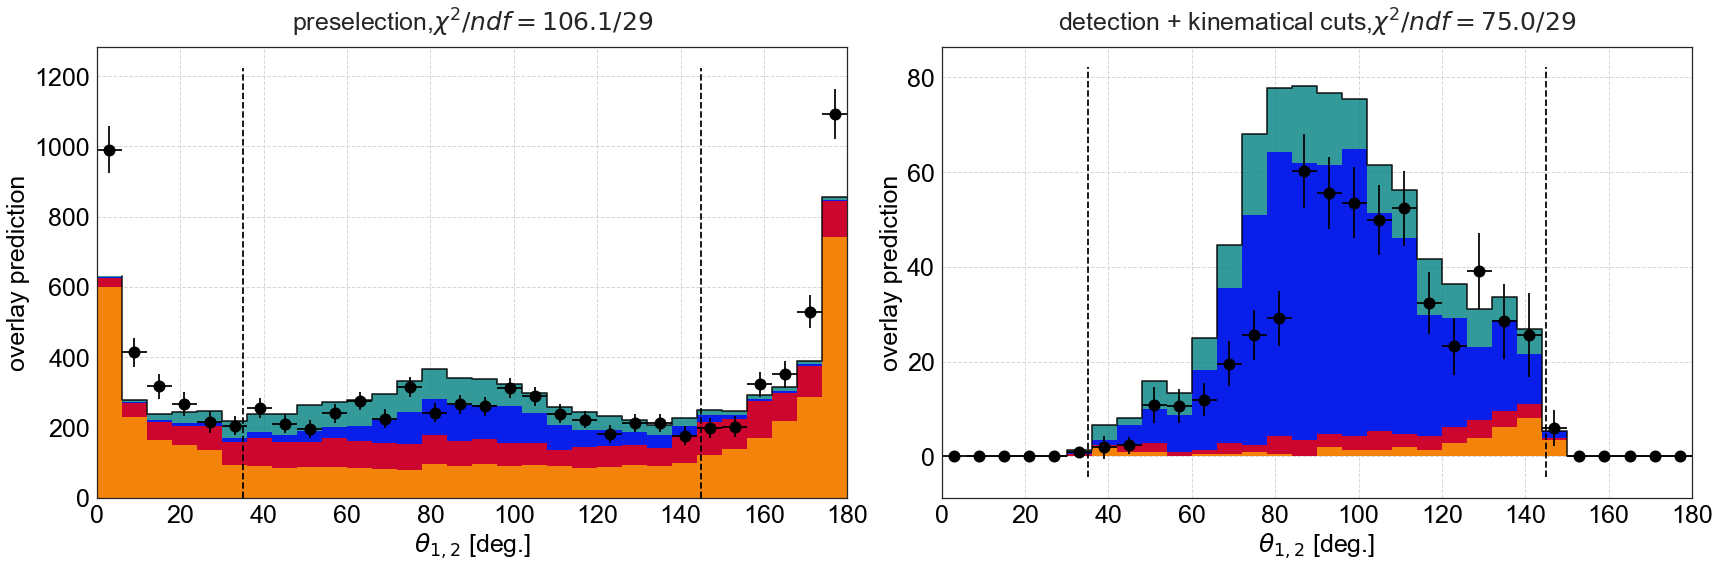

In [47]:
plot_OnOff_nocut_finalcut(var='theta_12',x_label= r'$\theta_{1,2}$ [deg.]',bins=linspace(0,180,31)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='only POT'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic,xlim=(0,180),chi2_xrange=(0,180),x_varcut=(35,145),debug=0
                   );

## $l_\mu - l_p$

In [48]:
cuts_order  = ['no cut','flash','non-collinearity','vertex activity','delta phi','soft Pt'] #,'PIDa'
cuts_labels = ['preselection','PMT cuts','collinearity cut','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut'] #,'PIDa cut'

reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


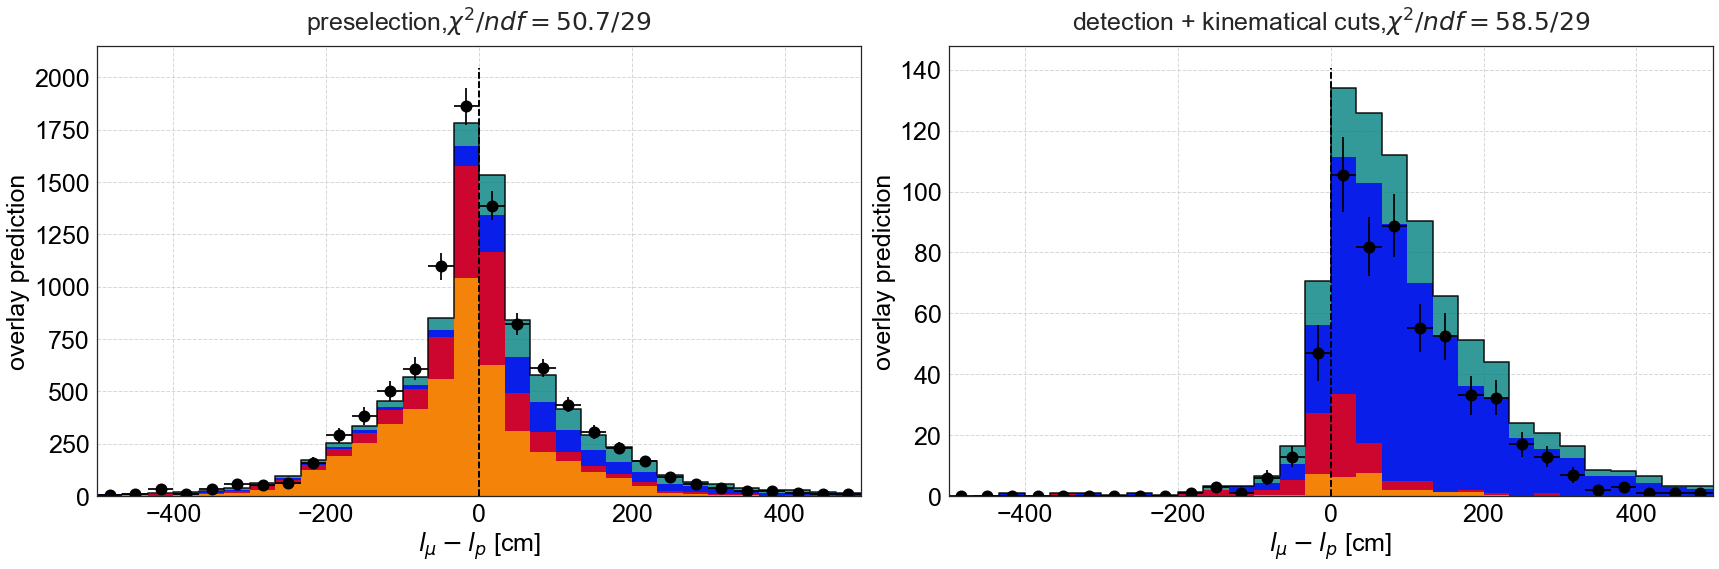

In [49]:
plot_OnOff_nocut_finalcut(var='l_mu-l_p',x_label= r'$l_{\mu}-l_p$ [cm]',bins=linspace(-500,500,31)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='only POT'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic,xlim=(-500,500),chi2_xrange=(-200,500),debug=0,x_varcut=(0,0)
                   );

## $\Delta \phi$

In [50]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','soft Pt']#,'PIDa'
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']#,'PIDa cut'
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


(array([  12.51722286,    4.81806542,    1.99285478,   14.52436808,
           5.81806542,   12.34957872,    3.76218404,    9.34957872,
          14.05588138,   13.76218404,   21.34957872,   29.11176276,
          49.9369734 ,   88.4054601 ,  131.52436808,  118.76218404,
          61.28655212,   55.4054601 ,   15.11176276,   13.4684867 ,
           6.88109202,    2.58739468,    5.29369734,    1.29369734,
           2.        ,    4.29369734,    0.        ,    1.        ,
           0.        ,    1.        ]),
 array([  19.68033652,   14.40024623,    9.12015595,   12.96022161,
          14.40024623,   12.00020519,   12.00020519,   13.92023803,
          21.60036935,   21.60036935,   32.64055813,   47.04080436,
          64.80110805,  113.76194525,  223.68382483,  184.32315179,
          89.28152665,   47.52081257,   25.92044322,   13.92023803,
           7.68013132,    8.64014774,    3.84006566,    2.88004925,
           5.76009849,    2.40004104,    0.96001642,    0.48000821,
        

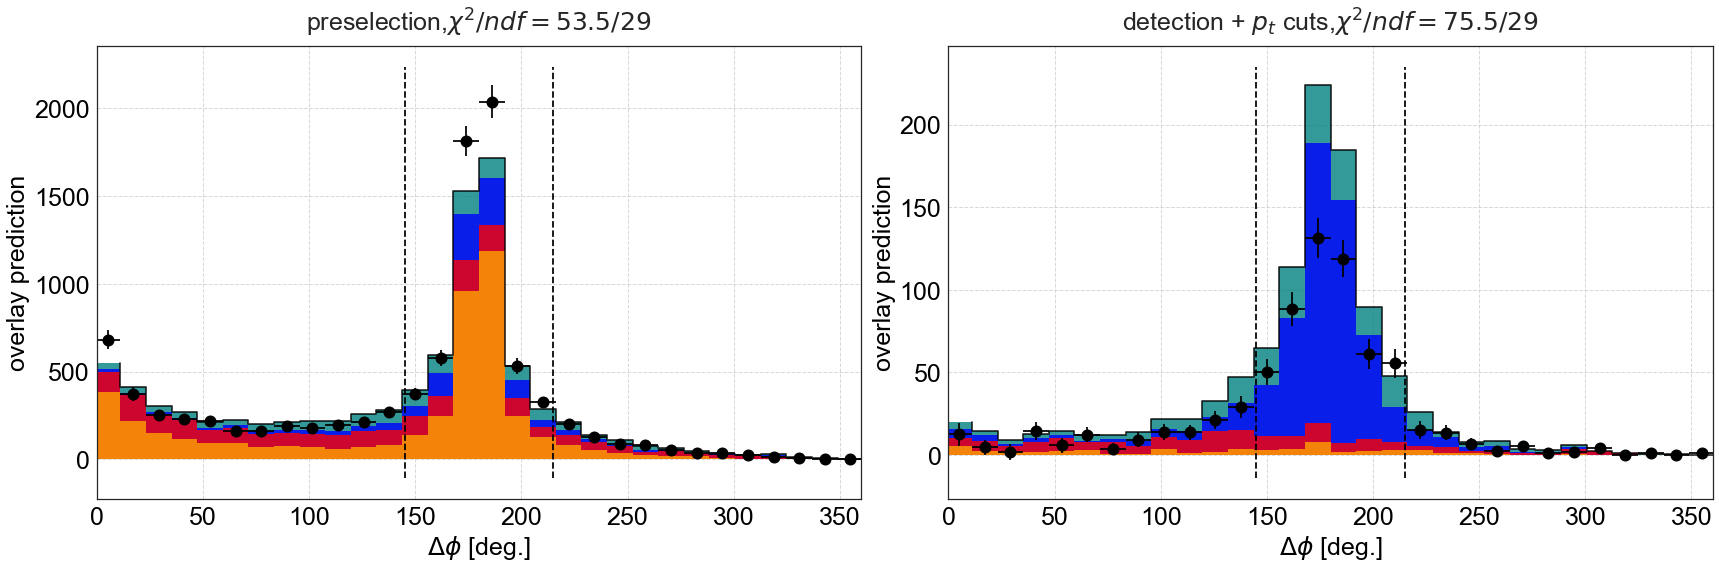

In [51]:
plot_OnOff_nocut_finalcut(var='delta_phi',x_label=  r'$\Delta \phi$ [deg.]',bins=linspace(-1,361,31),x_varcut=(145,215)
                    ,last_cut_name='soft Pt',last_cut_label='detection + $p_t$ cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='only POT'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,360),chi2_xrange=(0,360)
                   )

## number of PE in closest flash

In [52]:
cuts_order  = ['no cut','length','non-collinearity','vertex activity','delta phi','soft Pt']#,'PIDa'
cuts_labels = ['preselection',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']#,'PIDa cut'
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


In [53]:
OverlaySamples_noFlash = dict()
for pair_type in pair_types:
    OverlaySamples_noFlash[pair_type] = OverlaySamples[pair_type][OverlaySamples[pair_type]['ClosestFlash_TotalPE']<0]
    
reducedOverlay_noFlash,pureffOverlay_noFlash,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_noFlash,cuts_order=cuts_order)
print 'done applying cuts to overlay for no-flash'

OnBeamFV_noFlash = OnBeamFV[OnBeamFV['ClosestFlash_TotalPE']<0]
OffBeamFV_noFlash = OffBeamFV[OffBeamFV['ClosestFlash_TotalPE']<0]
reducedOnBeam_noFlash,reducedOffBeam_noFlash,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV_noFlash
                                                    ,OffBeamFV=OffBeamFV_noFlash,cuts_order=cuts_order)
print 'done applying cuts to data for no-flash'


OverlaySamples_withFlash = dict()
for pair_type in pair_types:
    OverlaySamples_withFlash[pair_type] = OverlaySamples[pair_type][OverlaySamples[pair_type]['ClosestFlash_TotalPE']>=0]
    
reducedOverlay_withFlash,pureffOverlay_withFlash,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_withFlash,cuts_order=cuts_order)
print 'done applying cuts to overlay for with-flashes'

OnBeamFV_withFlash = OnBeamFV[OnBeamFV['ClosestFlash_TotalPE']>=0]
OffBeamFV_withFlash = OffBeamFV[OffBeamFV['ClosestFlash_TotalPE']>=0]
reducedOnBeam_withFlash,reducedOffBeam_withFlash,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV_withFlash
                                                    ,OffBeamFV=OffBeamFV_withFlash,cuts_order=cuts_order)
print 'done applying cuts to data for with-flashes'

done applying cuts to overlay for no-flash
done applying cuts to data for no-flash
done applying cuts to overlay for with-flashes
done applying cuts to data for with-flashes


OnBeam-OffBeam (bins[:-1]):
[ -1.00000000e+00   9.90166667e+01   1.99033333e+02   2.99050000e+02
   3.99066667e+02   4.99083333e+02   5.99100000e+02   6.99116667e+02
   7.99133333e+02   8.99150000e+02   9.99166667e+02   1.09918333e+03
   1.19920000e+03   1.29921667e+03   1.39923333e+03   1.49925000e+03
   1.59926667e+03   1.69928333e+03   1.79930000e+03   1.89931667e+03
   1.99933333e+03   2.09935000e+03   2.19936667e+03   2.29938333e+03
   2.39940000e+03   2.49941667e+03   2.59943333e+03   2.69945000e+03
   2.79946667e+03   2.89948333e+03   2.99950000e+03   3.09951667e+03
   3.19953333e+03   3.29955000e+03   3.39956667e+03   3.49958333e+03
   3.59960000e+03   3.69961667e+03   3.79963333e+03   3.89965000e+03
   3.99966667e+03   4.09968333e+03   4.19970000e+03   4.29971667e+03
   4.39973333e+03   4.49975000e+03   4.59976667e+03   4.69978333e+03
   4.79980000e+03   4.89981667e+03   4.99983333e+03   5.09985000e+03
   5.19986667e+03   5.29988333e+03   5.39990000e+03   5.49991667e+03
   5.5

(array([-0.6575665]), array([ 11.04018878]))

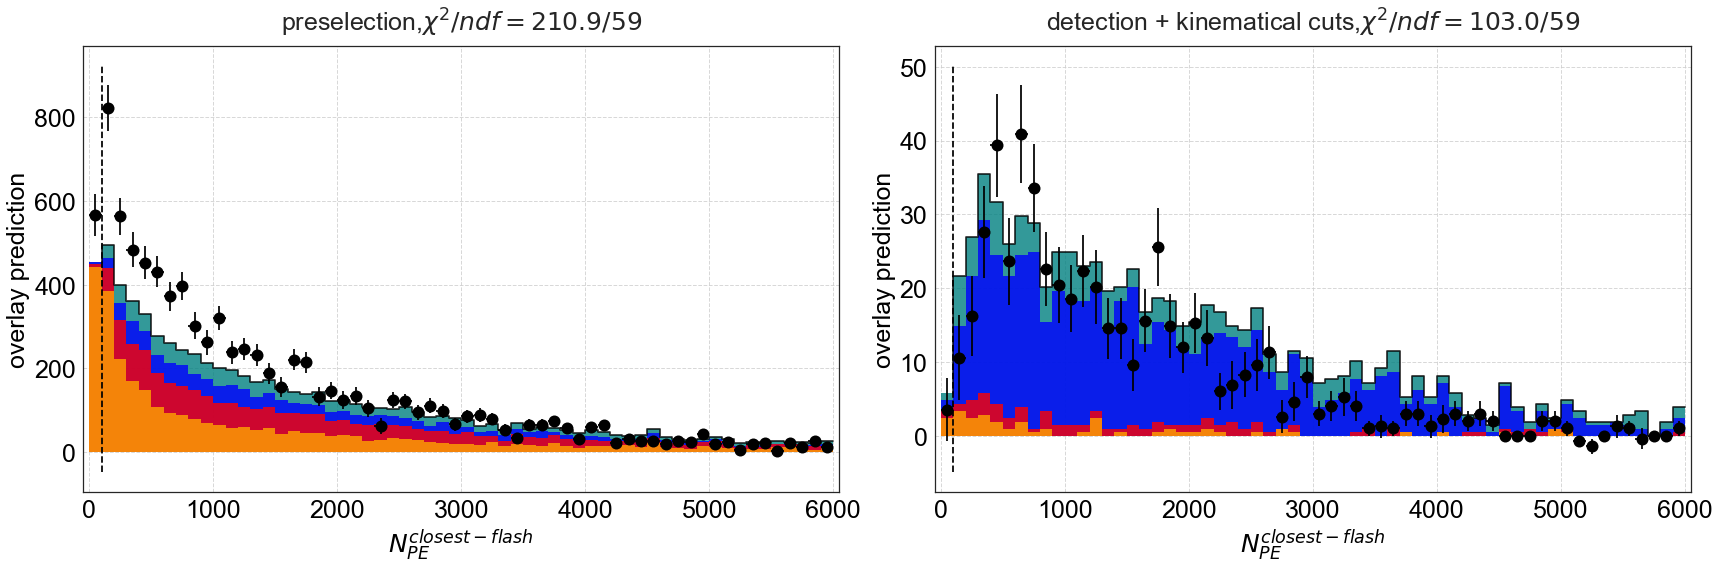

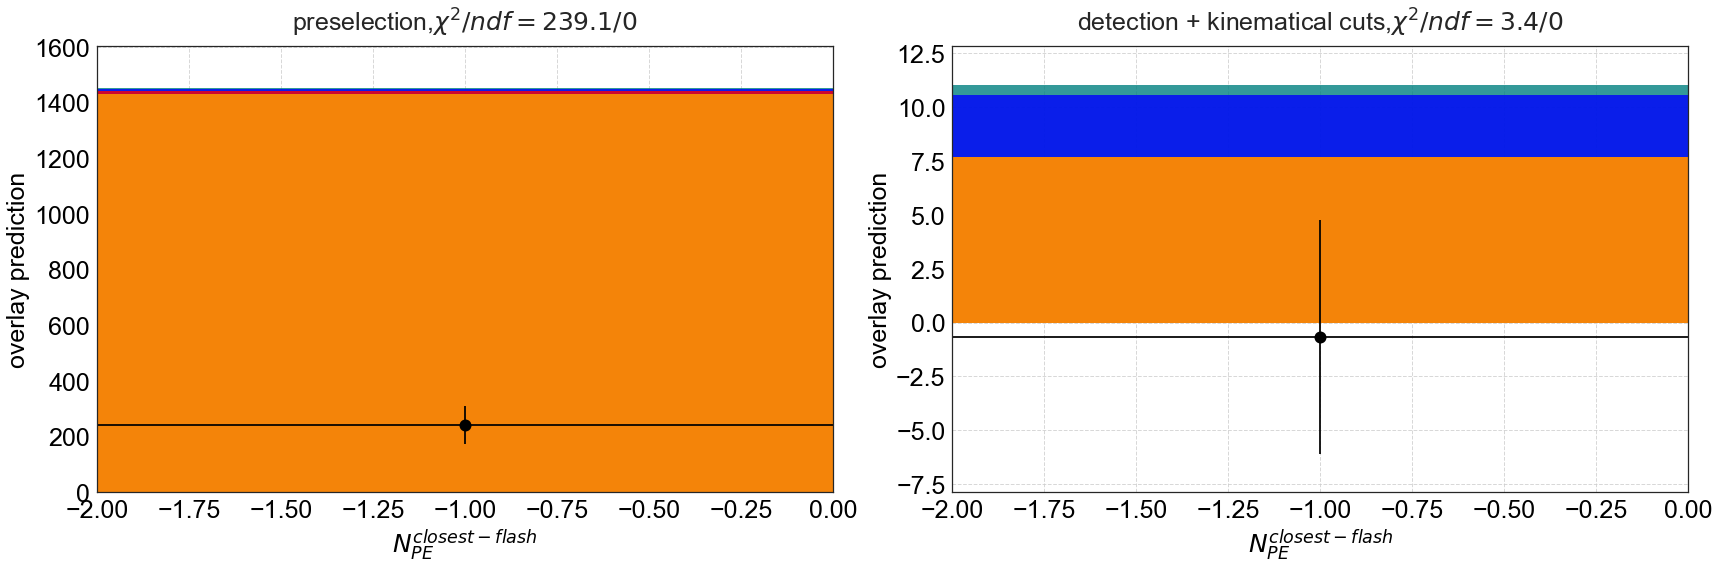

In [54]:
plot_OnOff_nocut_finalcut(var='ClosestFlash_TotalPE',x_label=  r'$N_{PE}^{closest-flash}$',bins=linspace(-1,6000,61)
                    ,x_varcut=(100,np.inf)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='only POT'               
                    ,reducedOffBeam=reducedOffBeam_withFlash
                    ,reducedOnBeam=reducedOnBeam_withFlash
                    ,reducedOverlay=reducedOverlay_withFlash
                    ,f_Cosmic=f_Cosmic,x_ticks = [0,500,1000,1500]
#                     ,xlim=(0,4500)
                    ,chi2_xrange=(0,4500)
                    ,debug=2
                   )

plot_OnOff_nocut_finalcut(var='ClosestFlash_TotalPE',x_label=  r'$N_{PE}^{closest-flash}$',bins=linspace(-2,0,2)
                    ,x_varcut=(100,np.inf)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='only POT'
                    ,reducedOffBeam=reducedOffBeam_noFlash
                    ,reducedOnBeam=reducedOnBeam_noFlash
                    ,reducedOverlay=reducedOverlay_noFlash
                    ,f_Cosmic=f_Cosmic,x_ticks = [0,500,1000,1500]
                    ,chi2_xrange=(-2,0),xlim=(-2,0)
                    ,debug=2
                   )

## $p_t$

In [55]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi']#,'PIDa'
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']#,'PIDa cut'
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


(array([  36.4684867 ,  102.23067074,  122.69915744,  114.99285478,
          65.81806542,   53.11176276,   27.9369734 ,   21.23067074,
          29.17478936,    7.76218404,    1.76218404,    7.88109202,
          -3.47563192,   -0.82521064,    0.58739468,    2.58739468,
           0.        ,    0.        ,   -0.41260532,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]),
 array([  92.1615759 ,  151.68259366,  158.88271678,  132.00225714,
          99.36169901,   83.52142816,   39.36067304,   29.28050068,
          22.08037756,   12.96022161,    9.12015595,    8.16013953,
           1.92003283,    2.88004925,    0.96001642,    0.        ,
           0.48000821,    0.        ,    0.        ,    0.48000821,
           0.        ,    0.        ,    0.        ,    0.48000821,
           0.        ,    0.        ,    0.        ,    0.        ,
        

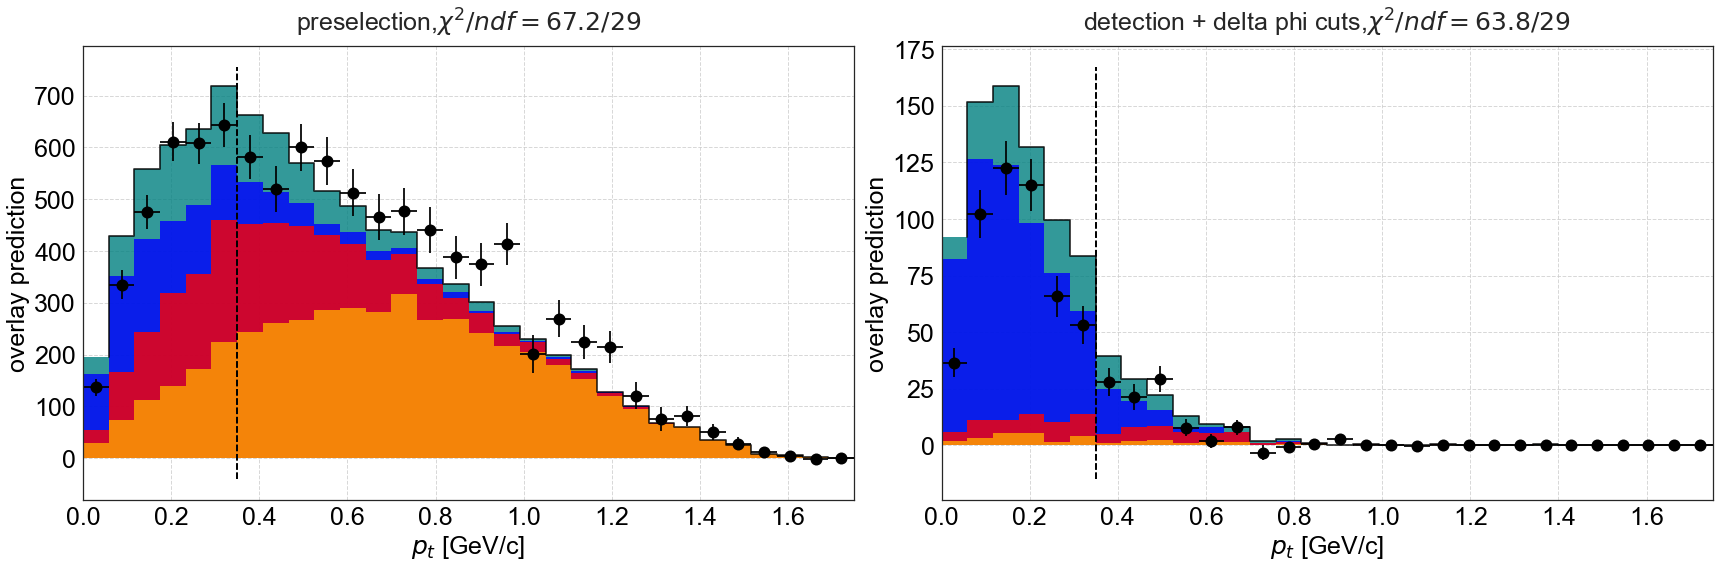

In [56]:
plot_OnOff_nocut_finalcut(var='reco_Pt',x_label=  r'$p_{t}$ [GeV/c]',bins=linspace(0,1.75,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='delta phi',last_cut_label='detection + delta phi cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='only POT'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.75),chi2_xrange=(0,1)
                   )

## vertex activity

In [57]:
cuts_order  = ['no cut','flash','length','non-collinearity','delta phi','soft Pt']#,'PIDa'
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity', r'$\Delta \phi$ cut',r'$p_t$ cut']#,'PIDa cut'
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


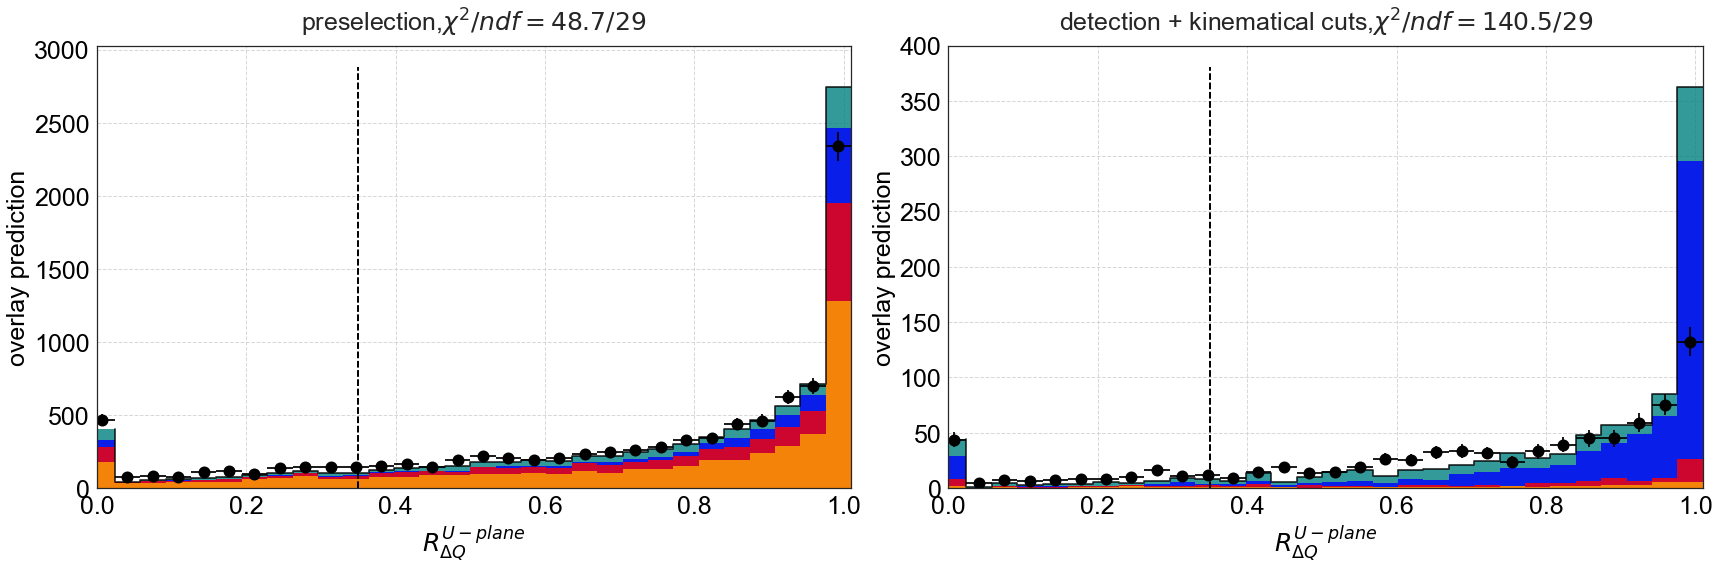

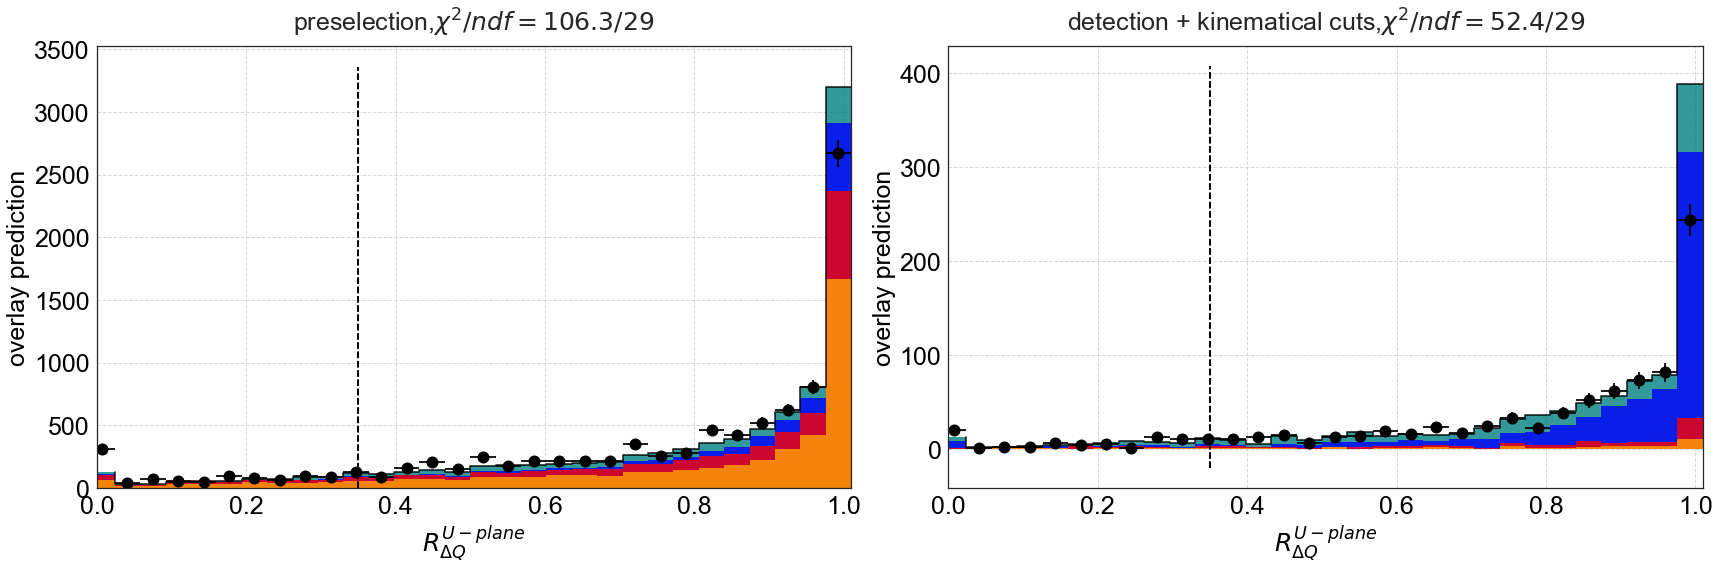

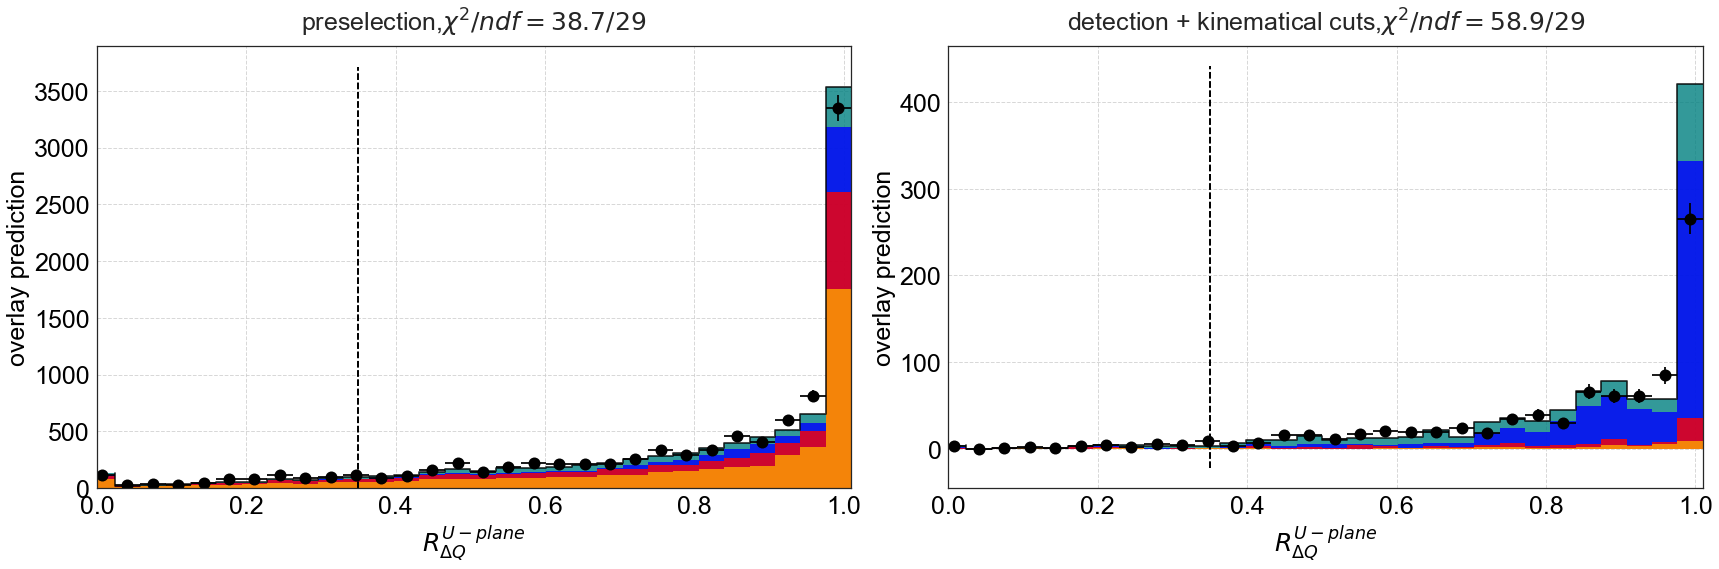

In [58]:
for plane in [0,1,2]:
    plot_OnOff_nocut_finalcut(var='RdQaroundVertex[plane %d][50 wires x 100 ticks]'%plane,x_label=  r'$R_{\Delta Q}^{U-plane}$'
                    ,bins=linspace(-0.01,1.01,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='only POT'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.01),chi2_xrange=(0,1)
                   )


## PIDa

In [59]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


(array([  0.        ,  -0.70630266,  -1.41260532,  -1.41260532,
          2.88109202,  -1.23781596,   0.58739468,   4.17478936,
          1.17478936,   0.88109202,   4.17478936,   1.88109202,
          8.05588138,  10.17478936,  10.17478936,  12.58739468,
         13.        ,  21.        ,  12.29369734,   8.        ,
         13.        ,  13.        ,  12.        ,  11.        ,
          7.29369734,  14.58739468,  10.58739468,  23.        ,
         15.        ,  19.        ,  20.        ,  24.88109202,
         25.        ,  30.        ,  31.58739468,  21.        ,
         12.        ,  19.88109202,  12.        ,  12.        ,
          4.        ,   6.        ,   2.        ,   0.29369734,
          1.        ,   1.        ,   1.        ,   2.29369734,
          0.        ,   1.        ]),
 array([   0.        ,    0.        ,    0.48000821,    0.96001642,
           0.96001642,    0.96001642,    0.96001642,    1.92003283,
           4.80008208,    7.68013132,    5.28009029,    8.

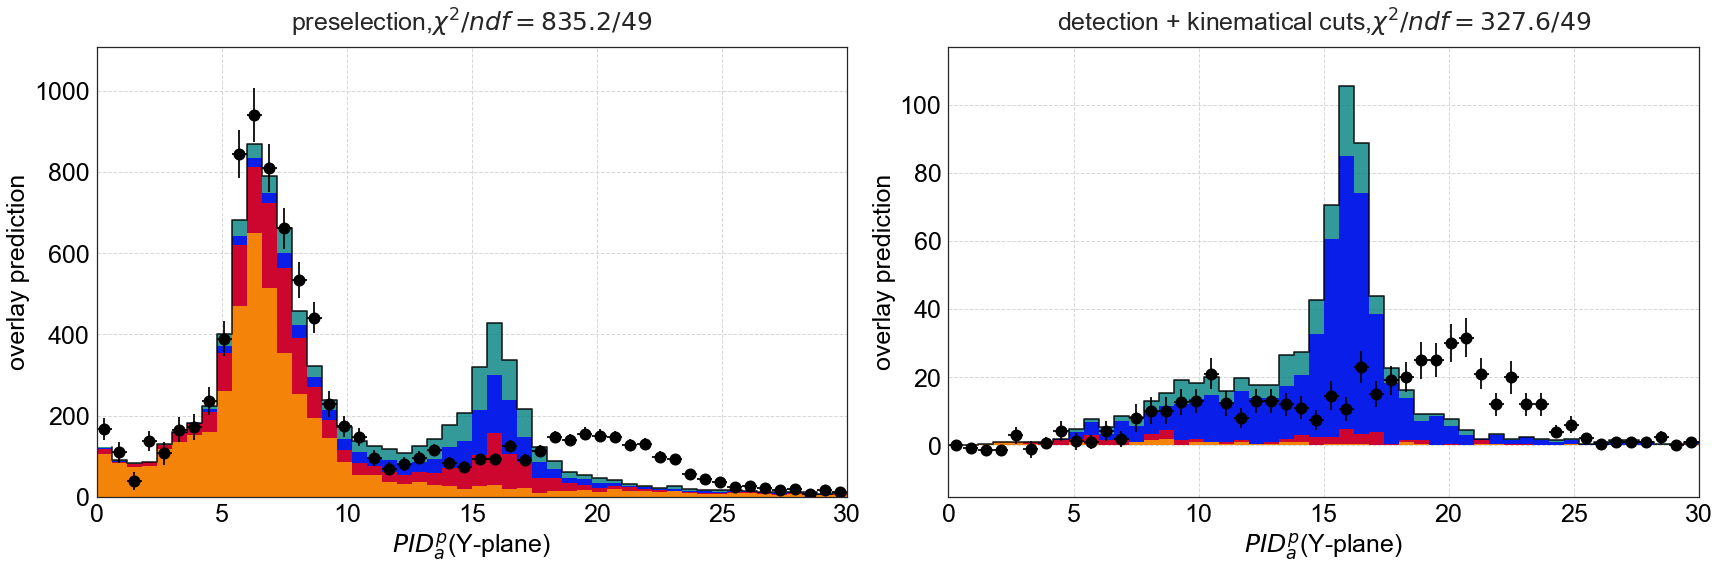

In [60]:
plot_OnOff_nocut_finalcut(var='pidcali_PIDaYplane_pCandidate'
                                       ,x_label= r'$PID_{a}^{p}$(Y-plane)',bins=linspace(0,30,51)
                                       ,overlay_scalings=overlay_scalings
                                       ,scaling_name='only POT'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,f_Cosmic=f_Cosmic
                                       ,xlim=(0,30)
                                       ,chi2_xrange=(0,30))

# $\chi^2_{\mu}$, $\chi^2_{p}$

In [61]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


(array([  4.88109202,   4.17478936,  16.4684867 ,   9.17478936,
         14.88109202,  14.88109202,   9.17478936,  13.9369734 ,
          9.34957872,  12.58739468,  10.88109202,  16.88109202,
          7.88109202,  10.17478936,   3.29369734,   7.58739468,
          8.58739468,   8.29369734,   3.29369734,   7.88109202,
         13.        ,  10.        ,   9.        ,   8.29369734,
         13.        ,   8.        ,   4.        ,   6.58739468,
          9.29369734,   9.        ,  12.        ,  16.        ,
         14.        ,  14.29369734,  14.        ,  14.        ,
         18.29369734,  17.        ,  22.29369734,  13.        ,
         11.        ,   9.        ,  10.        ,   6.        ,
          8.        ,   6.        ,   2.        ,   0.        ,
          2.        ,   1.        ]),
 array([  6.2401067 ,  12.96022161,  23.04039397,  26.40045143,
         22.56038577,  18.7203201 ,  15.36026265,  16.80028727,
         15.84027086,  16.80028727,  14.40024623,  14.40024623,
  

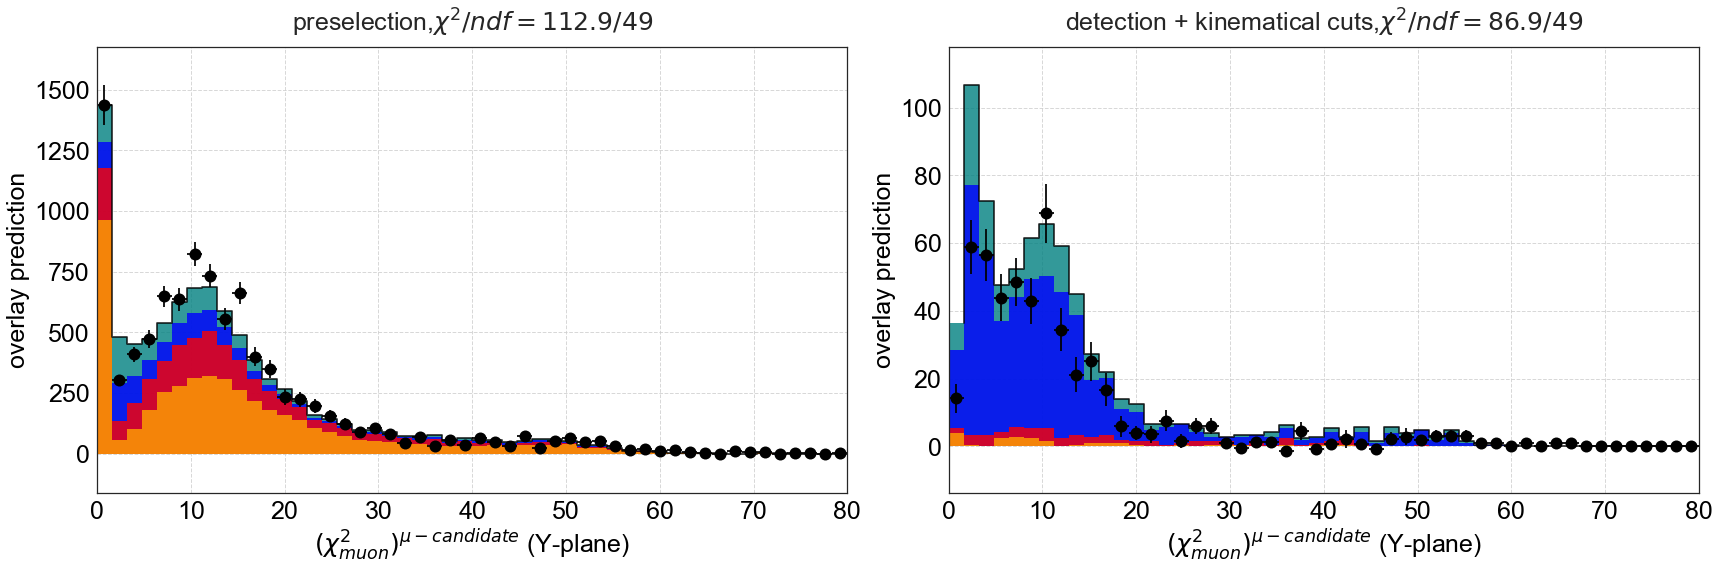

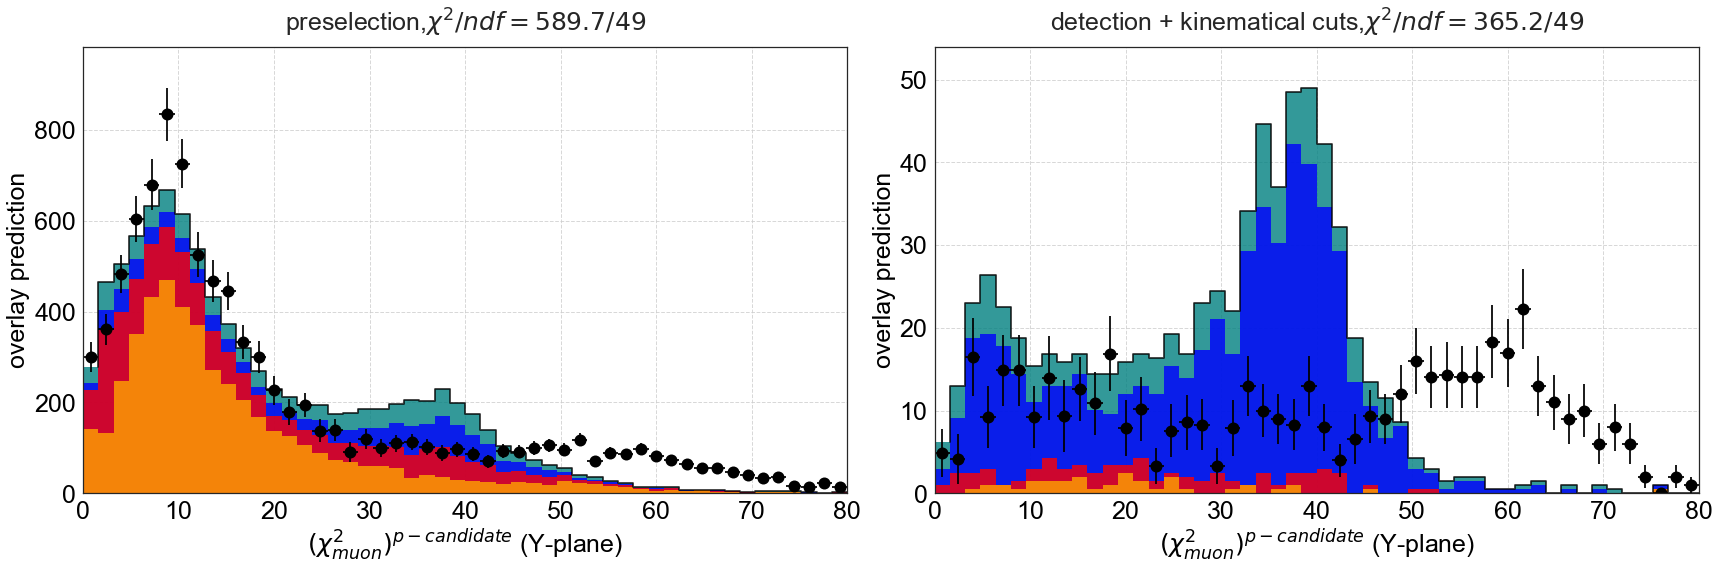

In [62]:
plot_OnOff_nocut_finalcut(var='pidcali_Chi2MuonYplane_muCandidate'
                                       ,x_label= r'$(\chi^2_{muon})^{\mu-candidate}$ (Y-plane)',bins=linspace(0,80,51)
                                       ,overlay_scalings=overlay_scalings
                                       ,scaling_name='only POT'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,f_Cosmic=f_Cosmic
                                       ,xlim=(0,80)
                                       ,chi2_xrange=(0,80))

plot_OnOff_nocut_finalcut(var='pidcali_Chi2MuonYplane_pCandidate'
                                       ,x_label= r'$(\chi^2_{muon})^{p-candidate}$ (Y-plane)',bins=linspace(0,80,51)
                                       ,overlay_scalings=overlay_scalings
                                       ,scaling_name='only POT'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,f_Cosmic=f_Cosmic
                                       ,xlim=(0,80)
                                       ,chi2_xrange=(0,80))

(array([  2.72111763e+02,   8.50000000e+01,   2.91747894e+01,
          2.31747894e+01,   2.31747894e+01,   1.63495787e+01,
          8.17478936e+00,   1.10558814e+01,   7.17478936e+00,
          7.58739468e+00,   5.87394680e-01,  -2.37815961e-01,
          1.17478936e+00,   4.46848670e+00,  -1.18907980e-01,
          1.88109202e+00,   3.29369734e+00,  -7.06302660e-01,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([ 444.0075922 ,   73.44125579,   40.32068945,   32.16054992,
          20.16034473,   24.00041039,   17.76030369,   15.36026265,
           9.60016416,    7.68013132,    7.68013132,    5.28009029,
           4.32007387,    3.84006566,    3.36005745,    3.84006566,
           2.88004925,    0.        ,    0.        ,    0.48000821,
           0.48000821,    0.        ,    0.48000821,    0.        ,    0.        ]))

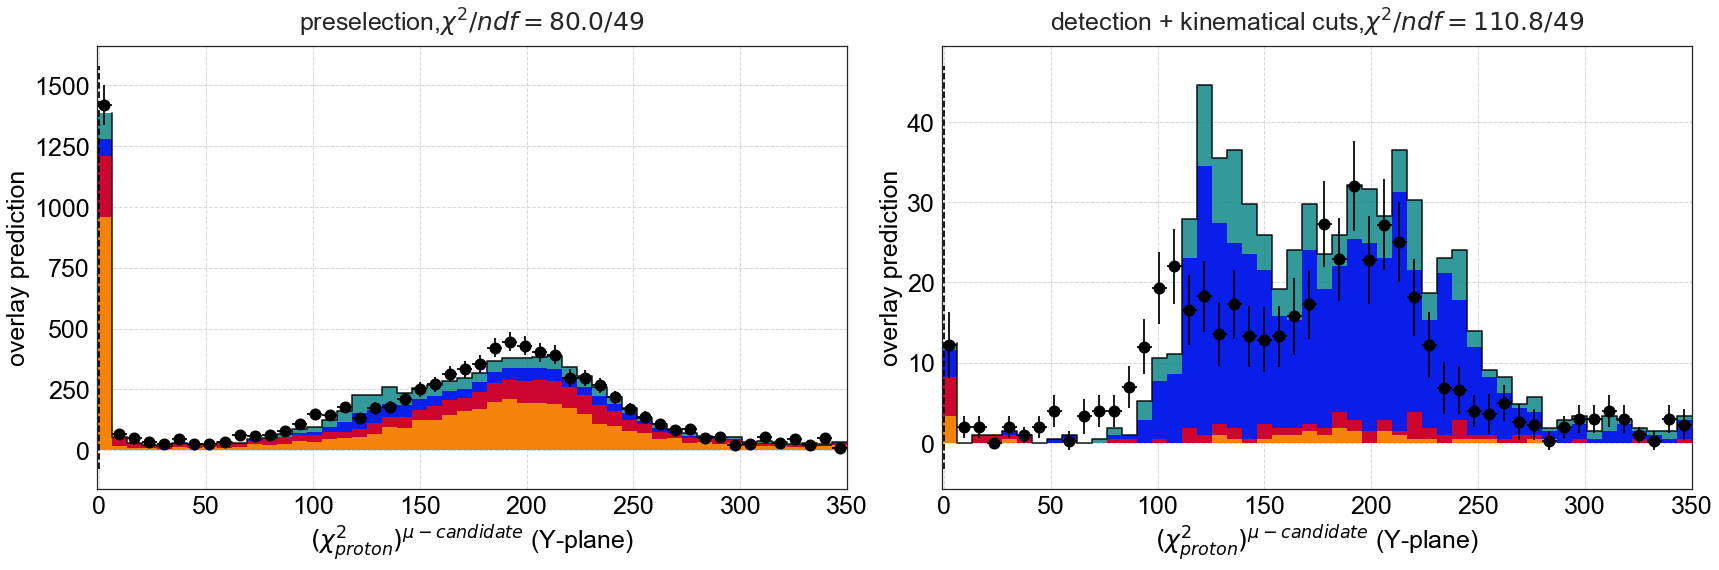

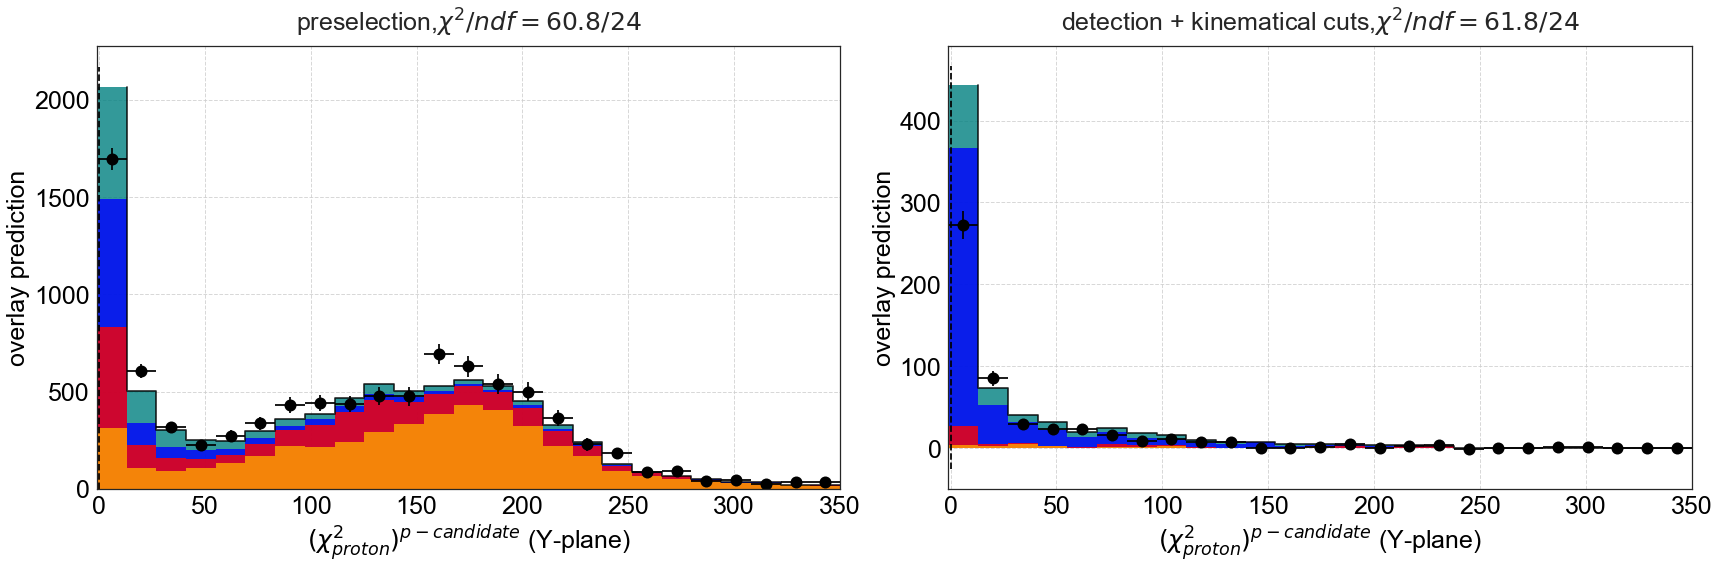

In [63]:
plot_OnOff_nocut_finalcut(var='pidcali_Chi2ProtonYplane_muCandidate'
                                       ,x_label= r'$(\chi^2_{proton})^{\mu-candidate}$ (Y-plane)',bins=linspace(-1,350,51)
                                       ,overlay_scalings=overlay_scalings
                                       ,scaling_name='only POT'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,f_Cosmic=f_Cosmic
                                       ,xlim=(-1,350)
                                       ,chi2_xrange=(0,300))

plot_OnOff_nocut_finalcut(var='pidcali_Chi2ProtonYplane_pCandidate'
                                       ,x_label= r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)',bins=linspace(-1,350,26)
                                       ,overlay_scalings=overlay_scalings
                                       ,scaling_name='only POT'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,f_Cosmic=f_Cosmic
                                       ,xlim=(-1,350)
                                       ,chi2_xrange=(0,300))